In [2]:
from Bio import SeqIO
from Bio import SeqRecord
from Bio import Seq
import numpy as np
from matplotlib import pyplot as plt


In [3]:
def processFasta(inputFasta):
    FL_sequences = []  # Setup an empty list
    for record in SeqIO.parse(inputFasta, "fasta"):
        FL_sequences.append(record)

    SEQS=[i.seq for i in FL_sequences]
    #print(SEQS)
    strings=["".join([j for j in Seq.translate(i)]) for i in SEQS]
    uniqueStrings, indices=np.unique(strings,return_index=True,axis=0)
    #print(uniqueStrings[0:3])
    uniqueSeqs=[FL_sequences[i] for i in indices]
    #print(uniqueSeqs[0:3])
    def H(column):
        chars, counts=np.unique(column,return_counts=True)
        #print(counts)
        ent=-sum(counts/sum(counts)*np.log2(counts/sum(counts)))
        return(ent)

    def entropy(sequences):
        columns=np.transpose([[j.seq for j in sequences]])
        ents=[H(column) for column in columns]
        return(ents)
    #print(uniqueSeqs)
    Hprofile=entropy(uniqueSeqs)
    SeqIO.write(uniqueSeqs,inputFasta+"Uniqued.fasta","fasta")

    print( "%i unique sequences after clustering." % len(uniqueSeqs))
    #print(Hprofile)
    plt.plot(Hprofile)
    plt.title("Entropy")
    plt.ylabel("H (Bits)")
    plt.xlabel("Position")

760 unique sequences after clustering.


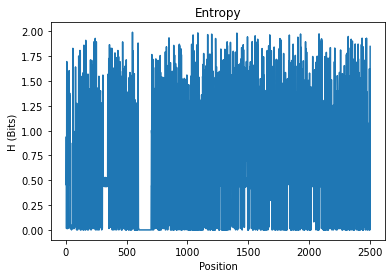

In [4]:
inputFasta="/Users/dolanpt/GitHub/Flavi_Sequence_Collections/ExpandedList/2-24-2022_Flavi.fasta_sized.fasta_codonAlign.aln_CprME_trim.fastaBIRCH_outputSeqs.fasta"
processFasta(inputFasta)